In [124]:
import pandas as pd 
import numpy as np 
from sklearn.decomposition import PCA, NMF, KernelPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt 

In [144]:
preterms = pd.read_csv('../../DerivedData/extracted_diffusion_metrics_preterm_group_mergedLR.csv', index_col=0)

preterms['group'] = 0
moderate = pd.read_csv('../../DerivedData/moderate_pairs_mean_diffusion_metrics_over_WM.csv', index_col=0)
for i, row in preterms.iterrows():
    if row.subject_id in moderate.preterm_ID.values:
        preterms.loc[i,'group'] = 1

controls = pd.read_csv('../../DerivedData/extracted_diffusion_metrics_control_group_mergedLR.csv', index_col=0)
controls['group'] = 2

In [145]:
df = pd.concat([preterms, controls])

In [146]:
y = df.group.values

In [147]:
tract_names = np.unique(np.array([tract.split('_')[0] for tract in preterms.columns[2:-1]]))
metrics =  [ 'AD', 'RD']#,'FA', 'ODI', 'NDI']
features = np.array([tract+'_'+metric for tract in tract_names for metric in metrics])

X = df[features].values

In [148]:
pca = PCA(n_components=8).fit(X)
X_r = pca.transform(X)

#nmf = NMF(n_components=2, max_iter=5000).fit(X)
#X_n = nmf.transform(X)

nmf = KernelPCA(n_components=8, kernel='rbf').fit(X)
X_n = nmf.transform(X)


explained variance ratio (first two components): [0.79964452 0.03869087 0.0280237  0.02433928 0.01709756 0.01537219
 0.01022435 0.01011733]


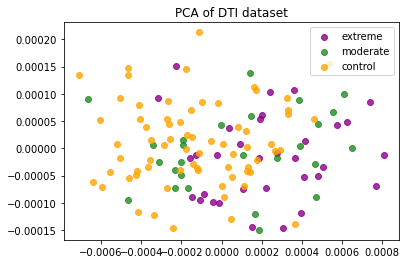

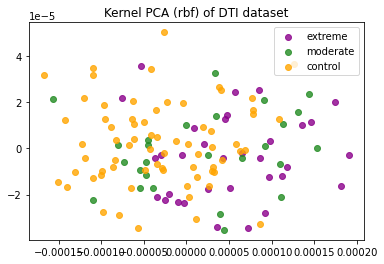

In [149]:
colors = ["darkmagenta", "forestgreen", 'orange']
target_names = ['extreme', 'moderate', "control"]

print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

for color, i, target_name in zip(colors, [0,1,2], target_names):
    

    plt.scatter(X_r[y==i,0], X_r[y==i,1], color=color, alpha = 0.8, label=target_name)

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of DTI dataset")
plt.show()

#print(
#    "explained variance ratio (first two components): %s"
#    % str(nmf.explained_variance_ratio_)
#)

for color, i, target_name in zip(colors, [0,1,2], target_names):
    

    plt.scatter(X_n[y==i,0], X_n[y==i,1], color=color, alpha = 0.8, label=target_name)

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("Kernel PCA (rbf) of DTI dataset")
plt.show()

